# Milestone 1

[Dashboard Visualisasi COVID-19 Vaccination Progress and Report](https://lookerstudio.google.com/s/qWCi4PVoZEc)

# Perkenalan
Name   : **Fadya Ulya Salsabila**

Batch  : **RMT-018**

# Identifikasi Masalah

### Topik

Perkembangan Vaksinasi Covid-19 di Dunia untuk Mencapai Kekebalan Kelompok (*Herd Immunity*).

### Latar Belakang

Covid-19 adalah pandemi yang ditetapkan oleh WHO sebagai pandemi global pada 11 Maret 2020. Pertama kali virus ini muncul di Kota Wuhan, Provinsi Hubei, Tiongkok pada bulan Desember 2019. Covid-19 ini disebabkan oleh coronavirus jenis baru yang diberi nama SARS-CoV-2. 

Virus ini menular dengan cepat dan menyebar ke wilayah lain di China dan sebagian besar negara di dunia, termasuk Indonesia. Hal ini membuat beberapa negara menerapkan kebijakan *lockdown* untuk mencegah penyebarannya. Pandemi ini juga mengakibatkan kenaikan tingkat kematian setiap harinya.

Karena mutasi virus berlangsung cepat, maka munculah varian atau *strain* baru dari virus SARS-CoV-2 ini. Varian baru ini menimbulkan gejala yang berbeda dan ada juga yang dapat memperparah gejala hingga mempercepat kematian. Oleh karena itu, China sebagai negara pertama virus ini muncul, membuat vaksin untuk mendapatkan kekebalan kelompok (*herd immunity*) agar dapat mengurangi tingkat kematian dan gejala yang ditimbulkan. *Herd immunity* adalah ketika sebagian besar populasi kebal terhadap penyakit menular tertentu sehingga memberikan perlindungan tidak langsung atau kekebalan kelompok bagi mereka yang tidak kebal terhadap penyakit menular tersebut.

Disusul pembuatan vaksin oleh negara lain sepert Amerika Serikat, Jerman, Inggris, Australia, dan Indonesia. Setelah itu, WHO menetapkan untuk dapat melakukan vaksin di seluruh negara agar mencapai kekebalan kelompok (herd immunity) dari virus Covid-19. Tujuan dari analisis data ini adalah untuk mengetahui perkembangan vaksinasi Covid-19 di dunia minimal 70% untuk mencapai kekebalan kelompok (*herd immunity*).

### Objective

1.   Mengetahui perkembangan vaksinasi Covid19 dari 2020 - 2022.
2.   Mengetahui distribusi vaksinasi di setiap negara.
3.   Mengetahui jenis vaksin yang digunakan setiap negara.
4.   Mengetahui persentase dosis lengkap vaksinasi setiap negara dan rata-rata vaksinasi per hari.
5.   Mengetahui tercapainya kekebalan kelompok atau belum.



### Problem Statement

Mengetahui perkembangan vaksinasi Covid-19 di dunia minimal 70% dari tahun 2020 - 2022 untuk mencapai kekebalan kelompok (*herd immunity*).

### Penjabaran Masalah

1. Negara mana saja yang melakukan vaksinasi dengan rata-rata vaksinasi Covid-19 per hari paling banyak?
2. Apa saja jenis vaksin Covid-19 yang digunakan di setiap negara?
3. Negara mana saja yang sudah melakukan vaksin lengkap dan berapa persentase tiap negara?
4. Bagaimana perkembangan vaksin dari dimulai hingga terakhir?
5. Apakah distribusi vaksinasi Covid-19 merata di setiap negara?
6. Berapa minimal rata-rata jumlah vaksinasi di tiap negara harus dicapai per hari?
7. Apakah persentase vaksinasi dosis lengkap sudah mencapai batas minimal sehingga tercapai *herd immunity*?

# Import The Library

In [1]:
# Connect Google Colab dengan Drive untuk load data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Library yang digunakan untuk mengolah data

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import plotly.express as px
import statistics
import scipy.stats as st
from scipy.stats import chi2_contingency
import sympy as sy

# Data Loading

*   Load data mentah dari file `.csv` yang diambil dari Kaggle `COVID-19 World Vaccination Progress` [kilk di sini](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?datasetId=1093816&sortBy=voteCount) dan pengenalan data.
*   Dilakukan pendefinisian data.
*   Loading data baris 5 teratas dan 5 terbawah.


### Pengenalan Data

Informasi mengenai data `COVID-19 World Vaccination Progress`:

1. `Country` - negara-negara yang menyediakan vaksinasi dan informasinya.
2. `Country Code` - kode ISO negara.
3. `Date` - tanggal pada saat entry data; yaitu beberapa mencakup vaksinasi harian dan beberapa mencakup vaksinasi dosis total (full).
4. `Total number of vaccinations` - jumlah mutlak dari total imunisasi di negara tersebut.
5. `Total number of people vaccinated` - seseorang, tergantung pada skema imunisasi, akan menerima satu atau lebih (biasanya 2) vaksin; pada saat tertentu, jumlah vaksinasi mungkin lebih banyak dari jumlah orang.
6. `Total number of people fully vaccinated` - jumlah orang yang menerima seluruh rangkaian imunisasi menurut skema imunisasi (umumnya 2); pada saat tertentu, mungkin ada sejumlah orang tertentu yang menerima satu vaksin dan jumlah lain (lebih kecil) orang yang menerima semua vaksin dalam skema.
7. `Daily vaccinations (raw)` - untuk entri data tertentu, nomor vaksinasi untuk tanggal/negara tersebut.
8. `Daily vaccinations` -  untuk entri data tertentu, nomor vaksinasi untuk tanggal/negara tersebut.
9. `Total vaccinations per hundred` - rasio (dalam persen) antara jumlah vaksinasi dengan jumlah penduduk sampai dengan saat ini di negara tersebut.
10. `Total number of people vaccinated per hundred` - rasio (dalam persen) antara penduduk yang diimunisasi dengan jumlah penduduk sampai dengan saat ini di negara tersebut.
11. `Total number of people fully vaccinated per hundred` - rasio (dalam persen) antara penduduk yang diimunisasi lengkap dengan jumlah penduduk sampai dengan saat ini di negara tersebut.
12. `Number of vaccinations per day` - jumlah vaksinasi harian di hari itu dan pada negara tersebut.
13. `Daily vaccinations per million` - rasio (dalam ppm) antara jumlah vaksinasi dan jumlah penduduk untuk tanggal sekarang di negara tersebut.
14. `Vaccines used in the country` - jumlah total vaksin yang digunakan di negara tersebut (up to date).
15. `Source name` - sumber informasi (otoritas nasional, organisasi internasional, organisasi lokal, dll).
16. `Source website` - website sumber informasi.

### Load Data

In [3]:
# Data diambil dari Kaggle, dilakukan pendefinisian data

dfvac = pd.read_csv('/content/drive/MyDrive/Hacktiv8 - Fadya Ulya/phase 0/country_vaccinations.csv')
dfvac

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Tabel `COVID-19 World Vaccination Progress` memiliki 86512 baris dan 15 kolom.
Lalu dilihat 5 baris pertama dan 5 baris terbawah.

In [4]:
# Melihat 5 baris pertama dari data

dfvac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
# Melihat 5 baris terbawah dari data

dfvac.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


# Data Cleaning

Data cleaning bertujuan untuk membersihkan missing values agar data siap digunakan untuk eksplorasi. Bab ini meliputi melihat info data dan merubahnya jika ada yang tidak sesuai, handling missing values, rename kolom, dan setelah datanya bersih lalu diexport sebagai file `.csv`.

### Melihat Info Data dan Merubah Tipe Data


In [6]:
# Melihat info data

dfvac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [7]:
# Merubah tipe data pada tanggal

dfvac['date']=dfvac['date'].astype('datetime64[ns]')

Kolom `date` diubah tipe datanya menjadi `datetime64[ns]` yang sebelumnya adalah `object`

### Handling Missing Values

In [8]:
# Cek missing values

mv = dfvac.isna().sum() # definisikan missing values dan mencari jumlah tiap kolom
print('\nJumlah missing value per kolom:\n', mv) # print mv


Jumlah missing value per kolom:
 country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


Missing values pada tabel `dfvac` yaitu pada kolom `total_vaccinations`, `people_vaccinated`, `pepople_fully_vaccinated`, `daily_vaccinations_raw`, `daily_vaccinations`, `total_vaccinations_per_hundred`, `people_vaccinated_per_hundred`, `people_fully_vaccinated_per_hundred`, dan `daily_vaccinations_per_million`. Karena total missing values banyak, maka akan hapus diisi dengan mean/median

In [9]:
# Copy dataframe untuk digunakan cleaning dan eksplorasi data, agar ada backup data asli

dfvac1 = dfvac.copy() # copy dataframe dari dfvac
dfvac1 # print dataframe hasil copy

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [10]:
# Mengisi missing values dengan median/mean. Sebelumnya cek value median dan mean dulu

print('Before tot_vac: mean = %f, median tot_vac = %f.' % (dfvac1['total_vaccinations'].mean(), dfvac1['total_vaccinations'].median())) # kolom total_vaccinations
print('Before pep_vac: mean = %f, median pep_vac = %f.' % (dfvac1['people_vaccinated'].mean(), dfvac1['people_vaccinated'].median()))  # people_vaccinated
print('Before pepful_vac: mean = %f, median pepful_vac = %f.' % (dfvac1['people_fully_vaccinated'].mean(), dfvac1['people_fully_vaccinated'].median())) # kolom people_fully_vaccinated
print('Before dairaw_vac: mean = %f, median dairaw_vac = %f.' % (dfvac1['daily_vaccinations_raw'].mean(), dfvac1['daily_vaccinations_raw'].median())) # kolom daily_vaccinations_raw
print('Before dai_vac: mean = %f, median dai_vac = %f.' % (dfvac1['daily_vaccinations'].mean(), dfvac1['daily_vaccinations'].median())) # kolom daily_vaccinations
print('Before pep_vachun: mean = %f, median pep_vachun = %f.' % (dfvac1['people_vaccinated_per_hundred'].mean(), dfvac1['people_vaccinated_per_hundred'].median())) # kolom people_vaccinated_per_hundred
print('Before dai_vachun: mean = %f, median dai_vachun = %f.' % (dfvac1['total_vaccinations_per_hundred'].mean(), dfvac1['total_vaccinations_per_hundred'].median())) # kolom total_vaccinations_per_hundred
print('Before pep_fulvachun: mean = %f, median pep_fulvachun = %f.' % (dfvac1['people_fully_vaccinated_per_hundred'].mean(), dfvac1['people_fully_vaccinated_per_hundred'].median())) # kolom people_fully_vaccinated_per_hundred
print('Before dai_vacmil: mean = %f, median dai_vacmil = %f.' % (dfvac1['daily_vaccinations_per_million'].mean(), dfvac1['daily_vaccinations_per_million'].median())) # kolom daily_vaccinations_per_million

Before tot_vac: mean = 45929644.638728, median tot_vac = 3590096.000000.
Before pep_vac: mean = 17705077.789800, median pep_vac = 2187310.500000.
Before pepful_vac: mean = 14138299.848152, median pepful_vac = 1722140.500000.
Before dairaw_vac: mean = 270599.578248, median dairaw_vac = 25309.000000.
Before dai_vac: mean = 131305.486075, median dai_vac = 7343.000000.
Before pep_vachun: mean = 40.927317, median pep_vachun = 41.435000.
Before dai_vachun: mean = 80.188543, median dai_vachun = 67.520000.
Before pep_fulvachun: mean = 35.523243, median pep_fulvachun = 31.750000.
Before dai_vacmil: mean = 3257.049157, median dai_vacmil = 2050.000000.


Karena kolom `total_vaccinations`, `people_vaccinated`, `pepople_fully_vaccinated`, `daily_vaccinations_raw`, dan `daily_vaccinations` memiliki selisih mean yang jauh dengan median, maka mengisi missing values pada kolom tersebut akan menggunakan median. 

Sedangkan kolom `total_vaccinations_per_hundred`, `people_vaccinated_per_hundred`, `people_fully_vaccinated_per_hundred`, dan `daily_vaccinations_per_million` memiliki selisih mean dan median yang tidak banyak, maka akan menggunakan mean untuk mengisi missing values pada kolom tersebut.

In [11]:
# Mengisi missing values sesuai dengan ketentuan di atas

dfvac1['total_vaccinations']= dfvac1['total_vaccinations'].fillna(dfvac1['total_vaccinations'].median()) # kolom total_vaccinations
dfvac1['people_vaccinated']= dfvac1['people_vaccinated'].fillna(dfvac1['people_vaccinated'].median()) # people_vaccinated
dfvac1['people_fully_vaccinated']= dfvac1['people_fully_vaccinated'].fillna(dfvac1['people_fully_vaccinated'].median()) # kolom people_fully_vaccinated
dfvac1['daily_vaccinations_raw']= dfvac1['daily_vaccinations_raw'].fillna(dfvac1['daily_vaccinations_raw'].median()) # kolom daily_vaccinations_raw
dfvac1['daily_vaccinations']= dfvac1['daily_vaccinations'].fillna(dfvac1['daily_vaccinations'].median()) # kolom daily_vaccinations
dfvac1['total_vaccinations_per_hundred']= dfvac1['total_vaccinations_per_hundred'].fillna(dfvac1['total_vaccinations_per_hundred'].mean()) # kolom total_vaccinations_per_hundred
dfvac1['people_vaccinated_per_hundred']= dfvac1['people_vaccinated_per_hundred'].fillna(dfvac1['people_vaccinated_per_hundred'].mean()) # kolom people_vaccinated_per_hundred
dfvac1['people_fully_vaccinated_per_hundred']= dfvac1['people_fully_vaccinated_per_hundred'].fillna(dfvac1['people_fully_vaccinated_per_hundred'].mean()) # kolom people_fully_vaccinated_per_hundred
dfvac1['daily_vaccinations_per_million']= dfvac1['daily_vaccinations_per_million'].fillna(dfvac1['daily_vaccinations_per_million'].mean()) # kolom daily_vaccinations_per_million

dfvac1 # print tabel yang sudah diisi dengan missing values

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,1722140.5,25309.0,7343.0,0.000000,0.000000,35.523243,3257.049157,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.590000,31.900000,23.020000,4610.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.250000,32.380000,23.110000,5528.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.610000,32.590000,23.150000,6005.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.200000,32.970000,23.200000,6667.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [12]:
# Cek kembali apakah missing values sudah teratasi

mv = dfvac1.isna().sum() # definisikan missing values dan mencari jumlah tiap kolom
print('\nJumlah missing value per kolom after cleaning:\n', mv) # print mv sesudah mengganti missing values


Jumlah missing value per kolom after cleaning:
 country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


Sudah tidak ada missing values setelah pengecekan kembali.

In [13]:
# Makesure kembali bahwa data lengkap, tidak ada missing value dan tipe data report_date sudah terganti

dfvac1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               86512 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       86512 non-null  float64       
 9   people_vaccinated_per_hundred        86512 non-null  float64       
 10  people_ful

Tipe data `date` sudah terganti dan missing values sudah tidak ada.

In [14]:
# Cek apakah ada duplicate columns

dfvac1.duplicated().sum()

0

Tidak ada kolom yang duplicate, sehingga tidak diperlukan untuk menghapus baris.

Lalu, rename kolom agar mudah untuk dibaca dan dipahami.

### Rename Kolom

In [15]:
# Copy dataframe untuk digunakan rename kolom agar ada backup data yang sudah dibersihkan missing valuesnya

dfvac2 = dfvac1.copy() # copy dataframe dari dfvac1
dfvac2 # print dataframe hasil copy

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,1722140.5,25309.0,7343.0,0.000000,0.000000,35.523243,3257.049157,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.590000,31.900000,23.020000,4610.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.250000,32.380000,23.110000,5528.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.610000,32.590000,23.150000,6005.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.200000,32.970000,23.200000,6667.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [16]:
# Rename semua kolom agar mudah dibaca dan dipahami

dfvac2.rename(columns={'country': 'Country', 'iso_code': 'Country Code', 'date': 'Date', 'total_vaccinations': 'Total Vac', 'people_vaccinated': 'People Vac', 'people_fully_vaccinated': 'People Fully Vac',
                   'daily_vaccinations_raw': 'Daily Vac Raw', 'daily_vaccinations': 'Daily Vac', 'total_vaccinations_per_hundred': 'Total Vac/Hundred', 
                   'people_vaccinated_per_hundred': 'People Vac/Hundred', 'people_fully_vaccinated_per_hundred': 'People Fully Vac/Hundred', 'daily_vaccinations_per_million': 'Daily Vac/Mil', 
                   'vaccines': 'Kind Vaccines', 'source_name': 'Source Name', 'source_website': 'Source Website'}, inplace=True)

dfvac2 # print tabel baru setelah direname

,Country,Country Code,Date,Total Vac,People Vac,People Fully Vac,Daily Vac Raw,Daily Vac,Total Vac/Hundred,People Vac/Hundred,People Fully Vac/Hundred,Daily Vac/Mil,Kind Vaccines,Source Name,Source Website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,1722140.5,25309.0,7343.0,0.000000,0.000000,35.523243,3257.049157,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.590000,31.900000,23.020000,4610.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.250000,32.380000,23.110000,5528.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.610000,32.590000,23.150000,6005.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.200000,32.970000,23.200000,6667.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


### Export Dataframe to CSV

In [17]:
# Mengambil data di tabel yang sudah dilakukan data cleaning
# Export dataframe to csv

dfvac2.to_csv("covid19_vac.csv", index=False)

# Analisis dan Perhitungan

Analisis dan perhitungan masuk ke dalam data exploration. Bab ini bertujuan untuk menganalisis data dan memvisualisasi data berdasarkan problem statement.

### Rentang Waktu Pengambilan Data

In [18]:
# Melihat waktu pengambilan data vaksinasi dari mulai 2021 hingga selesai di tahun 2022

dfvac2['Date'].min(), dfvac2['Date'].max()

(Timestamp('2020-12-02 00:00:00'), Timestamp('2022-03-29 00:00:00'))

Data di atas adalah vaksinasi yang dilakukan mulai tanggal 2 Desember 2020 - 29 Maret 2022.

In [19]:
# Cek rentang waktu pengambilan data

dfvac2['Date'].max() - dfvac2['Date'].min()

Timedelta('482 days 00:00:00')

Vaksinasi Covid-19 pada data di atas memakan waktu selama 482 hari atau 1 tahun 4 bulan 7 hari.

### Negara yang Melakukan Vaksinasi Covid-19 dengan Rata-rata per Hari Paling Banyak

In [20]:
# Menghitung macam dan jumlah value yang berada di Country

dfvac2['Country'].value_counts()

Norway                             482
Latvia                             480
Denmark                            476
United States                      471
Russia                             470
                                  ... 
Bonaire Sint Eustatius and Saba    146
Tokelau                            114
Saint Helena                        92
Pitcairn                            85
Falkland Islands                    67
Name: Country, Length: 223, dtype: int64

Berdasarkan perhitungan di atas, negara yang mengikuti vaksinasi Covid-19 adalah 223 negara termasuk negara bagian di dunia. Karena jumlah negara di dunia hanya 195 negara.

Text(0, 0.5, 'Rata-Rata Vaksinasi')

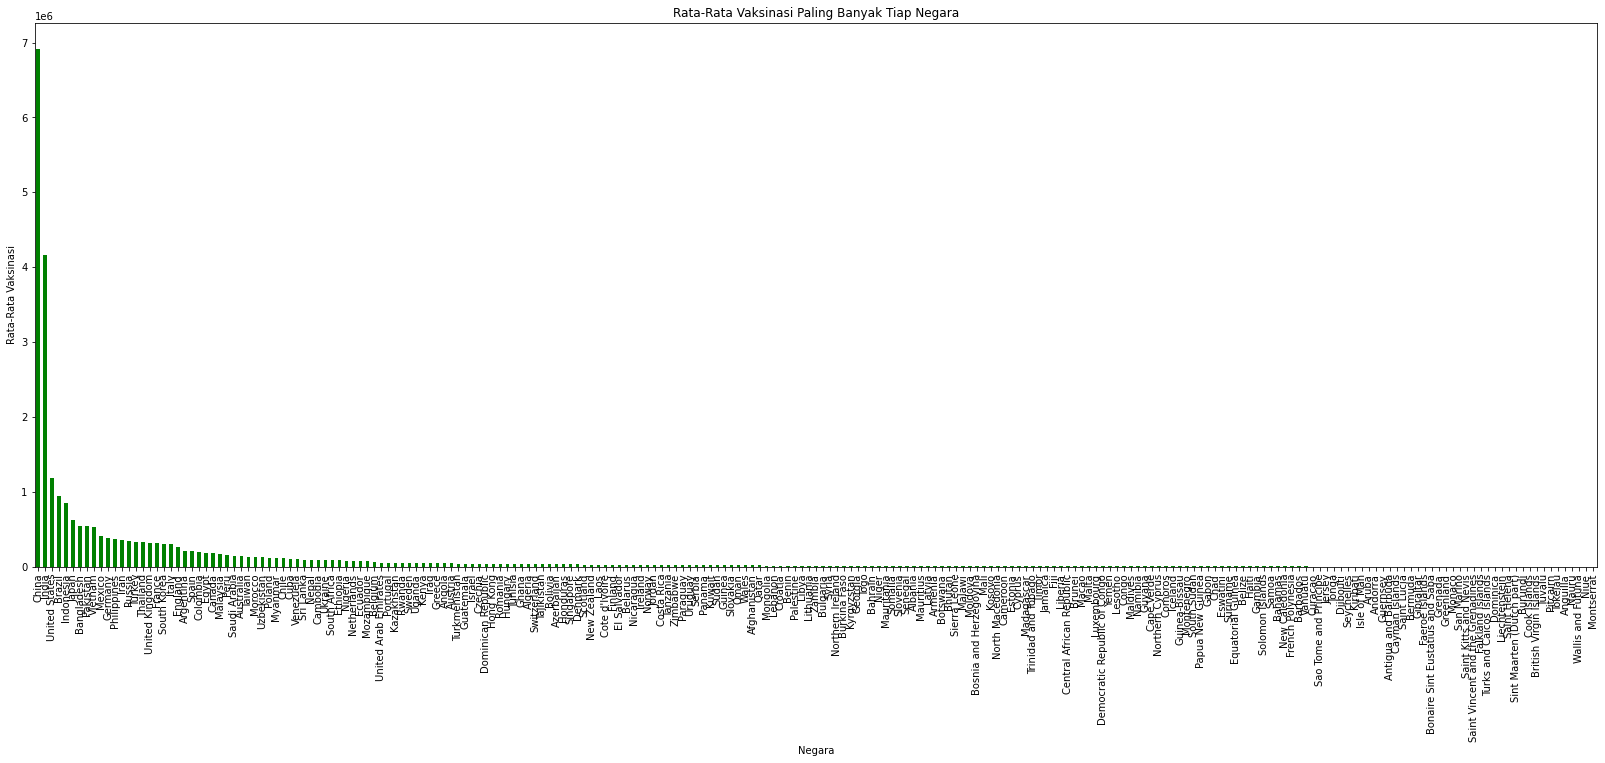

In [21]:
# Negara dengan rata-rata vaksinasi per hari paling banyak

fig1,ax1 = plt.subplots() # definisi gambar dan sumbu (axes)

dfvac2.groupby('Country').mean()['Daily Vac'].sort_values(ascending=False).plot(kind='bar',ax=ax1,figsize=(28,10), color='green')

ax1.set_title('Rata-Rata Vaksinasi Paling Banyak Tiap Negara') # tambahkan judul grafik
ax1.set_xlabel('Negara') # tambahkan keterangan sumbu x
ax1.set_ylabel('Rata-Rata Vaksinasi') # tambahkan keterangan sumbu y

Visualisasi di atas menunjukan bahwa lima negara dengan rata-rata vaksinasi Covid-19 terbanyak (tertinggi) per hari adalah `China` dengan urutan pertama, diikuti oleh `India`, `United States`, `Brazil`, dan `Indonesia`.

### Jenis Vaksin Covid-19 yang Digunakan Setiap Negara

In [22]:
# Groupby kolom Country, Iso Code, dan Kind Vaccines menggunakan dfvac1

negara_vaksin = dfvac1.groupby (["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                      'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()

<ipython-input-22-1b7bf5586b67>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  negara_vaksin = dfvac1.groupby (["country", "iso_code", "vaccines"])['total_vaccinations',


In [23]:
# Mendefinisikan kolom di dataframe negara_vaksin

negara_vaksin.columns = ['Country', 'iso_code', 'Vaccines', 'Total vaccinations', 'Percent', 'Daily vaccinations', 
                          'Daily vaccinations per million', 'People vaccinated', 'People vaccinated per hundred',
                          'People fully vaccinated', 'People fully vaccinated percent']

In [24]:
# Mencari jenis-jenis vaksin yang digunakan oleh setiap negara

vaksin = negara_vaksin.Vaccines.unique() # definisikan vaksin itu menggunakan dataframe negara_vaksin dan mencari Vaccines yang unik (muncul 1x saja)
for v in vaksin: # looping vaksin
    negara = negara_vaksin.loc[negara_vaksin.Vaccines==v, 'Country'].values # definisikan negara diambil dari Country dengan Vaccines
    print(f"Vaksin: {v}: \nNegara: {list(negara)}\n") # print nama-nama vaksin dan negara yang menggunakan

Vaksin: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing: 
Negara: ['Afghanistan', 'Belize', 'Cameroon', 'Namibia', 'Trinidad and Tobago']

Vaksin: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V: 
Negara: ['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Oman']

Vaksin: Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V: 
Negara: ['Algeria', 'Zimbabwe']

Vaksin: Moderna, Oxford/AstraZeneca, Pfizer/BioNTech: 
Negara: ['Andorra', 'Australia', 'England', 'Fiji', 'Finland', 'Guernsey', 'Isle of Man', 'Japan', 'Jersey', 'Northern Ireland', 'Scotland', 'Sint Maarten (Dutch part)', 'Sweden', 'United Kingdom', 'Wales']

Vaksin: Oxford/AstraZeneca: 
Negara: ['Angola', 'Democratic Republic of Congo', 'Falkland Islands', 'Kiribati', 'Liberia', 'Mali', 'Montserrat', 'Nauru', 'Nigeria', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands', 'Togo', 'Tonga', 'Tuvalu', 'Vanuatu'

Tiap negara menggunakan jenis vaksin Covid-19 yang berbeda. Merujuk pada lima negara dengan rata-rata vaksinasi per hari terbanyak (tertinggi), maka penggunaan vaksin di negara tersebut meliputi:
1.   `China`: CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001
2.  `India`: Covaxin, Oxford/AstraZeneca, Sputnik V
3.   `United States`: Johnson&Johnson, Moderna, Pfizer/BioNTech
4.   `Brazil`: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
5.   `Indonesia`: Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac



In [25]:
# Melihat jenis-jenis vaksin yang digunakan di tiap negara

fig = px.choropleth(locations=negara_vaksin['Country'], # membuat visualisasi dengan gambar berdasarkan lokasi (negara)
                    locationmode="country names", # state lokasi (nama negara)
                    color=negara_vaksin['Vaccines'], # tambahkan warna pada negara yang berbeda
                    title="Negara yang Menggunakan Jenis Vaksin (Tiap Negara Memiliki Warna yang Berbeda)",
                    height = 800 # ukuran visualisasi gambar
                   )
fig.update_layout({'legend_orientation':'v'}) # v adalah hasil looping yang berisi jenis vaksin dan negara pengguna
fig.update_layout({'legend_title':'Jenis Vaksin'}) # keterangan judul
fig.show() # print tampilkan gambar visualisasi

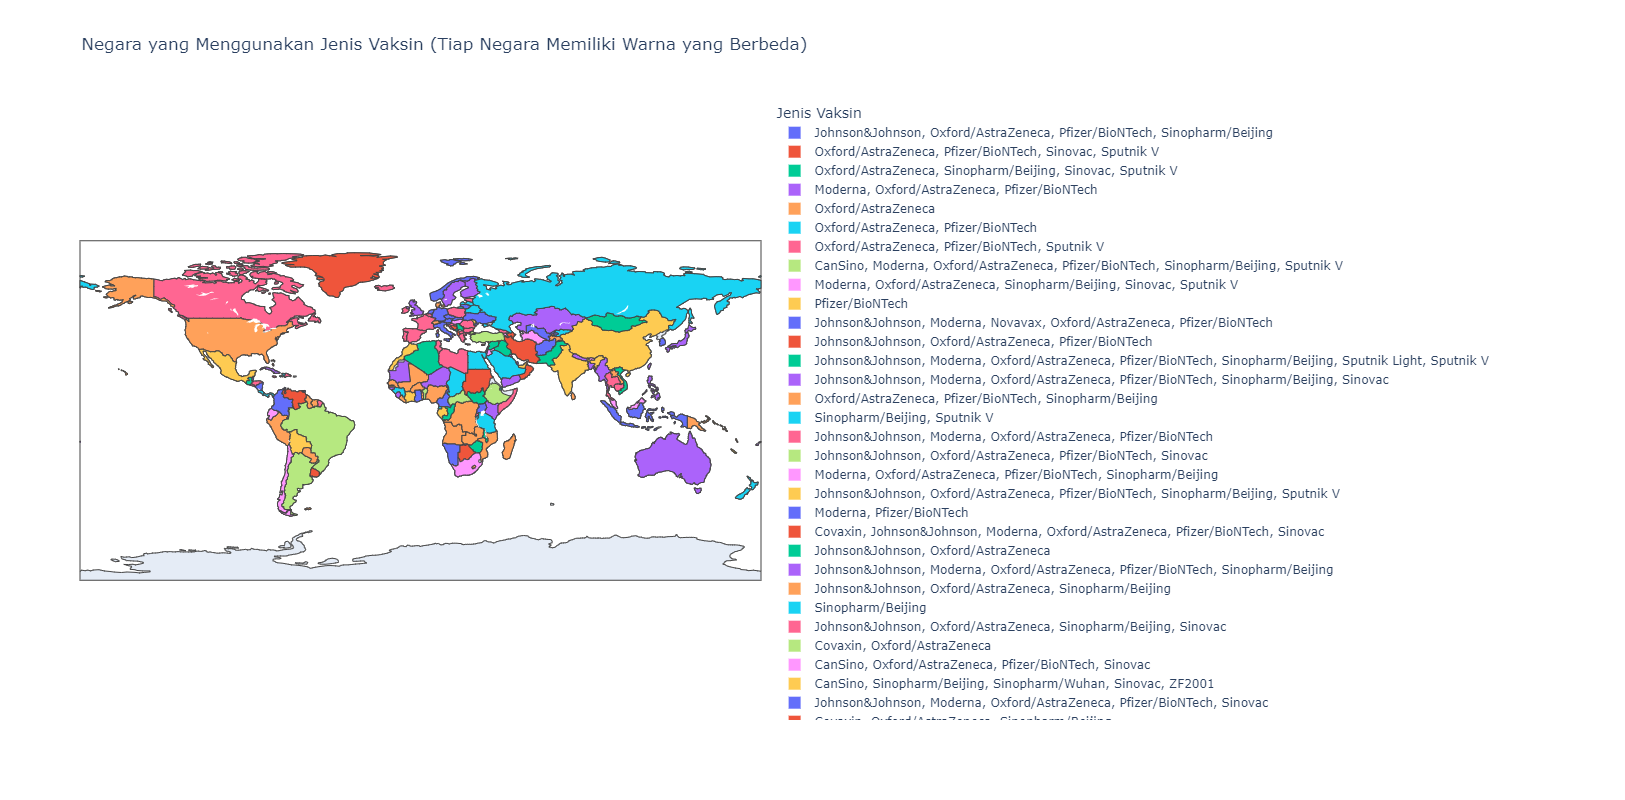

Berdasarkan visualisasi gambar penggunaan vaksin di tiap negara di atas, menunjukkan bahwa setiap negara menggunakan kombinasi jenis vaksin Covid-19 yang berbeda. Biasanya pemilihan vaksin tersebut didasarkan oleh tipe vaksin (vaksin mRNA dan vaksin virus yang dilemahkan), efikasi (keefektifan), KIPI (Kejadian Ikutan Pasca Imunisasi), lama waktu pembentukan antibodi, negara produksi vaksin, serta syarat vaksin untuk usia dan keadaan tertentu (ibu hamil, ibu menyusui, lansia, anak-anak).

In [26]:
# Menghitung jenis dan jumlah vaksin

dfvac2['Kind Vaccines'].value_counts()

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                     7608
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                      6263
Oxford/AstraZeneca                                                                6022
Oxford/AstraZeneca, Pfizer/BioNTech                                               4629
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech            3564
                                                                                  ... 
Johnson&Johnson, Oxford/AstraZeneca, Sinovac                                       312
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                   311
Johnson&Johnson, Moderna                                                           251
Johnson&Johnson, Pfizer/BioNTech, Sinopharm/Beijing                                228
EpiVacCorona, Oxford/AstraZeneca, QazVac, Sinopharm/Beijing, Sputnik V, ZF2001     190
Name: Kind Vaccines, Length: 84, dtype: int

Terdapat 84 kombinasi jenis vaksin Covid-19 di tiap negara. Kombinasi vaksin jenis `Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech` adalah kombinasi vaksin yang paling sering digunakan, yaitu sebanyak 7688 kali. Spesifikasi vaksin tersebut adalah:
1.   `Johnson&Johnson`
   - Produsen: Amerika Serikat
   - Efikasi: 67.2% mencegah semua gejala Covid-19 dan 66.1% mencegah gejala Covid-19 sedang hingga berat di atas 18 tahun.
   - KIPI: nyeri, kemerahan, bengkak
   - Jenis Vaksin: Adenovirus


2.   `Moderna`
   - Produsen: Amerika Serikat
   - Efikasi: 95% mencegah semua gejala Covid-19 
   - KIPI: nyeri, kemerahan, bengkak, mual, dan muntah
   - Jenis Vaksin: mRNA (materi genetik berupa asamribonukleat)


3.   `Oxford/AstraZeneca`
   - Produsen: Australia
   - Efikasi: 62-92% mencegah semua gejala Covid-19 
   - KIPI: alergi dan syok anafilaktik
   - Jenis Vaksin: Viral Vector (virus termodifikasi secara genetik)

4.   `Pfizer/BioNTech`
   - Produsen: Jerman dan Amerika Serikat
   - Efikasi: 95% mencegah semua gejala Covid-19 
   - KIPI: nyeri otot, nyeri sendi, kemerahan, bengkak
   - Jenis Vaksin: mRNA (materi genetik berupa asamribonukleat)  


### Negara yang Sudah Melakukan Vaksinasi Lengkap dan Persentasenya 

In [27]:
# Visualisasi negara dengan persentase yang sudah melakukan vaksin lengkap

DFvac= pd.DataFrame(dfvac1.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending = False)) # definisikan dataframe baru dengan groupby negara dan orang yang telah vaksinasi lengkap terbanyak
DFvac.reset_index(level=0,inplace=True)

fig = px.pie(DFvac, # definisi untuk membuat chart pie
             values='people_fully_vaccinated', # dengan metric values beriisi orang yang telah vaksinasi lengkap
             names='country', # berdasarkan negara
             hover_data=['country'], # list dari negara yang akan ditambahkan
             labels={'country':'country'} # hubungan dari axes dan data plots
            )
fig.update_traces(textposition='inside', # memasukkan text di dalam chart
                  textinfo='percent+label' # text berisi persentase dan label
                 )
fig.update_layout(title='<b>Vaksinasi Dosis Lengkap COVID19<b>', # tulis judul pie chart
                  titlefont={'size': 25, # spesifikasi judul mengenai ukuran font
                             'family': 'Arial', # spesifikasi judul mengenai jenis font
                             'color': 'black', # spesifikasi judul mengenai warna font
                            },
                  showlegend=True, # menampilkan keterangan
                  width=800, # menampilkan ukuran lebar
                  height=800) # menampilkan ukuran tinggi
annotations = [] # menambah keterangan
annotations.append(dict(xref='paper', yref='paper',
                        x=0, y=1.03, # meletakkan keterangan sesuai spasi
                        text="<b>Persentase Negara yang Sudah Melakukan Vaksin Lengkap Berdasarkan Populasi<b>", # text keteragan
                             font=dict(
                                 family='Arial', # spesifikasi jenis font
                                 size=15, # spesifikasi ukuran font
                                 color='black'# spesifikasi warna font
                             ),
                        showarrow=False)
                  )
fig.update_layout(annotations=annotations) # masukkan layout termasuk keterangan ke dalam visualisasi gambar
fig.show() # print menampilkan visualisasi pie chart

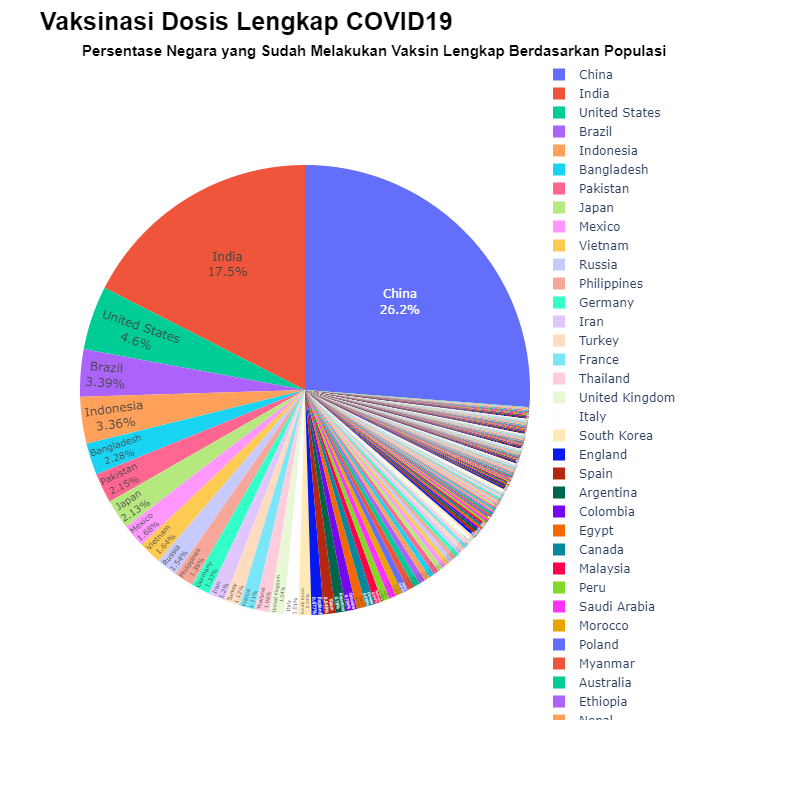

Negara yang sudah melakukan vaksinasi Covid-19 dosis lengkap (yaitu minimal 2 dosis vaksin, karena ada juga vaksin booster yang dimulai dari bulan Januari 2022) paling tinggi adalah `China` dengan persentase 26.2% dari populasinya. Diikuti oleh `India` sebanyak 17.5%, `United States` 4.6%, `Brazil` 3.39%, dan `Indonesia` sebesar 3.36%.

### Perkembangan Vaksinasi Covid-19 dari Mulai - Sekarang

Vaksinasi yang dilakukan mulai tanggal 2 Desember 2020 - 29 Maret 2022.

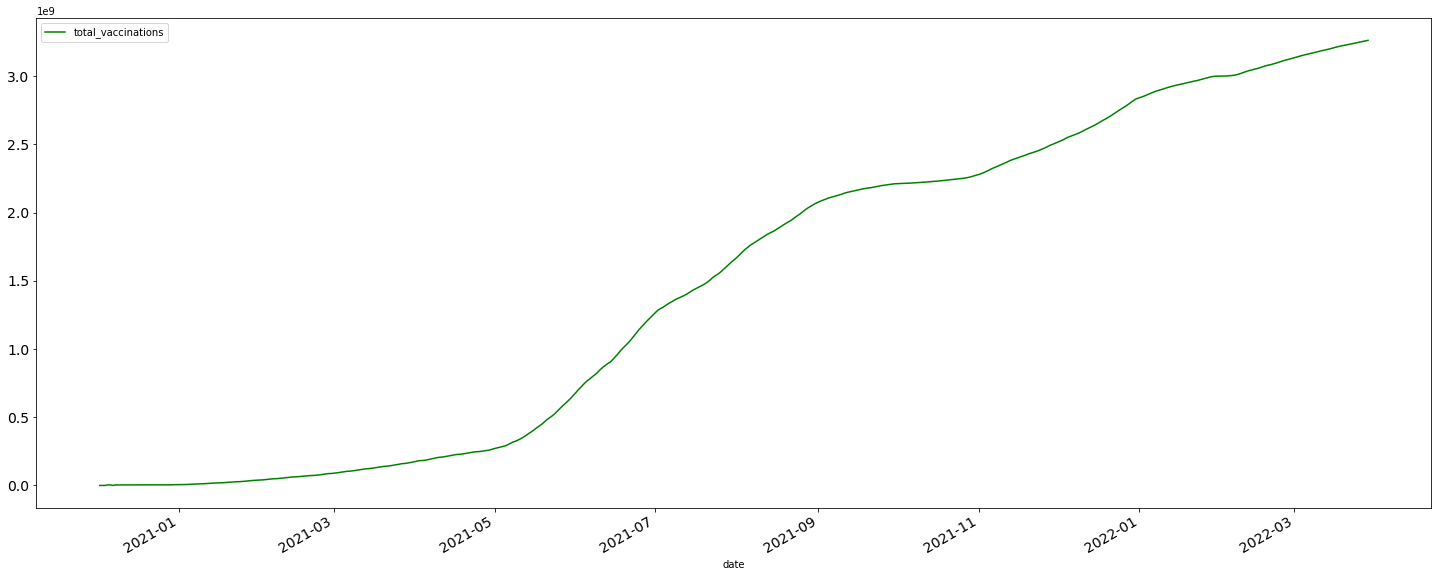

In [28]:
DFvactot= pd.DataFrame(dfvac1.groupby("date")["total_vaccinations"].max().sort_values(ascending = False)) # definisikan dataframe baru dengan groupby date dengan total vaksinasi
DFvactot.reset_index(level=0,inplace=True)

DFvactot.plot('date', 'total_vaccinations', figsize=(25,10), color='green', fontsize=14)

Berdasarkan visualisasi grafik garis di atas, sejak vaksinasi Covid-19 dimulai pada bulan Desember 2020, kegiatan vaksinasi ini terus mengalami peningkatan sampai bulan Maret 2022.

Dimulai dari pemberian dosis pertama, kemudian dilanjutkan dengan pemberian kedua. Setelah itu, jika sudah melakukan vaksin dosis lengkap, WHO memperbolehkan masyarakat untuk melakukan vaksin booster yang dimulai sekitar bulan Desember 2021 dan Januari 2022. Dosis vaksin booster adalah 2 kali seperti dosis umum.

Pemberlakuan vaksin booster bertujuan untuk meningkatkan antibodi di dalam tubuh sehingga bisa lebih tahan terhadap virus Covid-19 yang terus bermutasi dan menyebabkan gejala baru bahkan lebih parah.

### Distribusi Vaksinasi di Semua Negara

Bertujuan untuk melihat distribusi vaksinasi Covid-19 di setiap negara apakah merata atau tidak menggunakan **Uji Distribusi**.

In [29]:
# Cek apakah data vaksinasi terdistribusi normal atau tidak dengan melihat total vaksinasi per hari
# Dengan cara melihat nilai min, max, mean, median, dan modus

print ('Min: ' + str(dfvac2['Total Vac'].min())) # mencari nilai terendah total vaksinasi
print ('Mode: ' + str(dfvac2['Total Vac'].mode()[0])) # mencari nilai yang sering muncul total vaksinasi
print ('Median: ' + str(dfvac2['Total Vac'].median())) # mencari nilai tengah total vaksinasi
print ('Mean: ' + str(dfvac2['Total Vac'].mean())) # mencari rata-rata total vaksinasi
print ('Max: ' + str(dfvac2['Total Vac'].max())) # mencari nilai tertinggi total vaksinasi
print ('Sum: ' + str(dfvac2['Total Vac'].sum())) # mencari jumlah total vaksinasi

Min: 0.0
Mode: 3590096.0
Median: 3590096.0
Mean: 24931652.055680137
Max: 3263129000.0
Sum: 2156887082641.0


Nilai modus, median, dan mean memiliki nilai yang bervariasi.

In [30]:
# Melihat distribusi vaksinasi menggunakan skewness

print(dfvac1.total_vaccinations.skew())

13.892873533352958


Nilai skew menunjukkan > 0.5, yaitu data di atas bernilai 13.9. Maka, data di atas tergolong distribusi tidak normal.

In [31]:
# Melihat mean dan standar deviation dari data untuk menentukan distribusi

df_mean = np.mean(dfvac2['Total Vac']) # definisikan rata-rata
df_std = np.std(dfvac2['Total Vac']) # definisikan standar deviasi

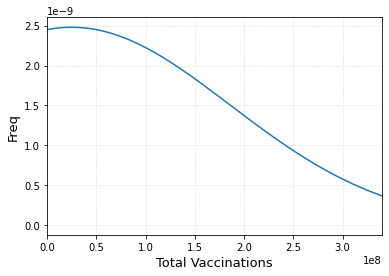

In [32]:
# Menghitung probability density function (PDF)
pdf = stats.norm.pdf(dfvac2['Total Vac'].sort_values(), df_mean, df_std) # definisikan pdf

# Membuat grafik
plt.plot(dfvac2['Total Vac'].sort_values(), pdf)
plt.xlim([0,340000000])  
plt.xlabel('Total Vaccinations', size=13) # set label x
plt.ylabel('Freq', size=13) # set label y
plt.grid(True, alpha=0.3, linestyle="--")
plt.show() # print visualisasi 

Hasil visualisasi pada uji distribusi di atas menunjukkan bahwa kemiringan kurva adalah ke kanan (right-skewed), sehingga tidak terdistribusi normal. Distribusi normal memiliki ciri-ciri sebagai berikut: bentuk kurva simetris, mean dan median sama; keduanya terletak di pusat distribusi, 68 persen data berada dalam 1 standar deviasi rata-rata.

Dalam distribusi normal, data terdistribusi secara simetris tanpa kemiringan. Sebagian besar nilai mengelompok di sekitar wilayah pusat, dengan nilai yang semakin berkurang saat menjauh dari pusat. Ukuran tendensi sentral (rata-rata, modus, dan median) sama persis dalam distribusi normal.

Berdasarkan hasil visualisasi PDF di atas, maka vaksinasi Covid-19 di tiap negara **tidak merata jumlahnya (tidak terdistribusi normal)**. Karena garis pada kurva miring ke kanan.

### Minimal Rata-rata Capaian Jumlah Vaksinasi di Setiap Negara per Hari

Minimal rata-rata capaian jumlah vaksinasi di setiap negara per hari akan dihitung menggunakan `Confidence Interval`.

Confidence Interval adalah sesuatu parameter yang digunakan untuk menentukan keakuratan mean suatu sampel. Mencari confidence interval dengan 95% kepercayaan. Interval kepercayaan 95% adalah rentang nilai di atas dan di bawah perkiraan titik di mana nilai sebenarnya dalam populasi kemungkinan besar berada pada tingkat kepercayaan 95%. 5% lainnya adalah kemungkinan bahwa nilai sebenarnya tidak berada dalam selang kepercayaan.

In [33]:
# Menghitung confidence interval, 95%

st.t.interval(alpha = 0.95, df=len(dfvac2['Total Vac'])-1, # definisikan CI dengan alpha 95%, menggunakan data total vaksinasi per hari
              loc = np.mean(dfvac2['Total Vac']),
              scale = st.sem(dfvac2['Total Vac']))

(23859743.731821515, 26003560.37953876)

`Confidence Interval` di atas menggunakan data `Total Vac` yaitu jumlah vaksinasi dosis 1 dan dosis lengkap per hari untuk dapat melihat keakuratan mean sampel. Hasilnya adalah bahwa 95% yakin bahwa rata-rata total vaksinasi yang dilakukan setiap harinya adalah berada di antara 23859743 - 26003560 orang yang divaksin agar distribusi vaksin merata dan bisa mencapai *herd immunity*.

Jika pemerintah setiap negara ingin cepat mencapai *herd immunity* maka dapat dilakukan vaksinasi Covid-19 sebanyak 23859743 - 26003560 orang/hari.

### Persentase Vaksinasi Dosis Lengkap

In [34]:
# Mencari persentase dari negara yang sudah melakukan vaksinasi dosis lengkap

dfvac2['percent'] = (dfvac2['People Fully Vac'] / dfvac2['People Fully Vac'].sum()) * 100 # definisikan persen, hitung People Fully Vac/Hundred
dfvac2 # print hasil

,Country,Country Code,Date,Total Vac,People Vac,People Fully Vac,Daily Vac Raw,Daily Vac,Total Vac/Hundred,People Vac/Hundred,People Fully Vac/Hundred,Daily Vac/Mil,Kind Vaccines,Source Name,Source Website,percent
0,Afghanistan,AFG,2021-02-22,0.0,0.0,1722140.5,25309.0,7343.0,0.000000,0.000000,35.523243,3257.049157,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.000273
1,Afghanistan,AFG,2021-02-23,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.000273
2,Afghanistan,AFG,2021-02-24,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.000273
3,Afghanistan,AFG,2021-02-25,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.000273
4,Afghanistan,AFG,2021-02-26,3590096.0,2187310.5,1722140.5,25309.0,1367.0,80.188543,40.927317,35.523243,34.000000,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.000273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.590000,31.900000,23.020000,4610.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.000551
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.250000,32.380000,23.110000,5528.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.000553
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.610000,32.590000,23.150000,6005.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.000554
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.200000,32.970000,23.200000,6667.000000,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.000555


Perhitungan di atas bertujuan untuk membuat kolom `percent` yang berisi output perhitungan persentase dari kolom `People Fully Vac` berdasarkan negara yang berbeda.

Text(0, 0.5, 'Persentase')

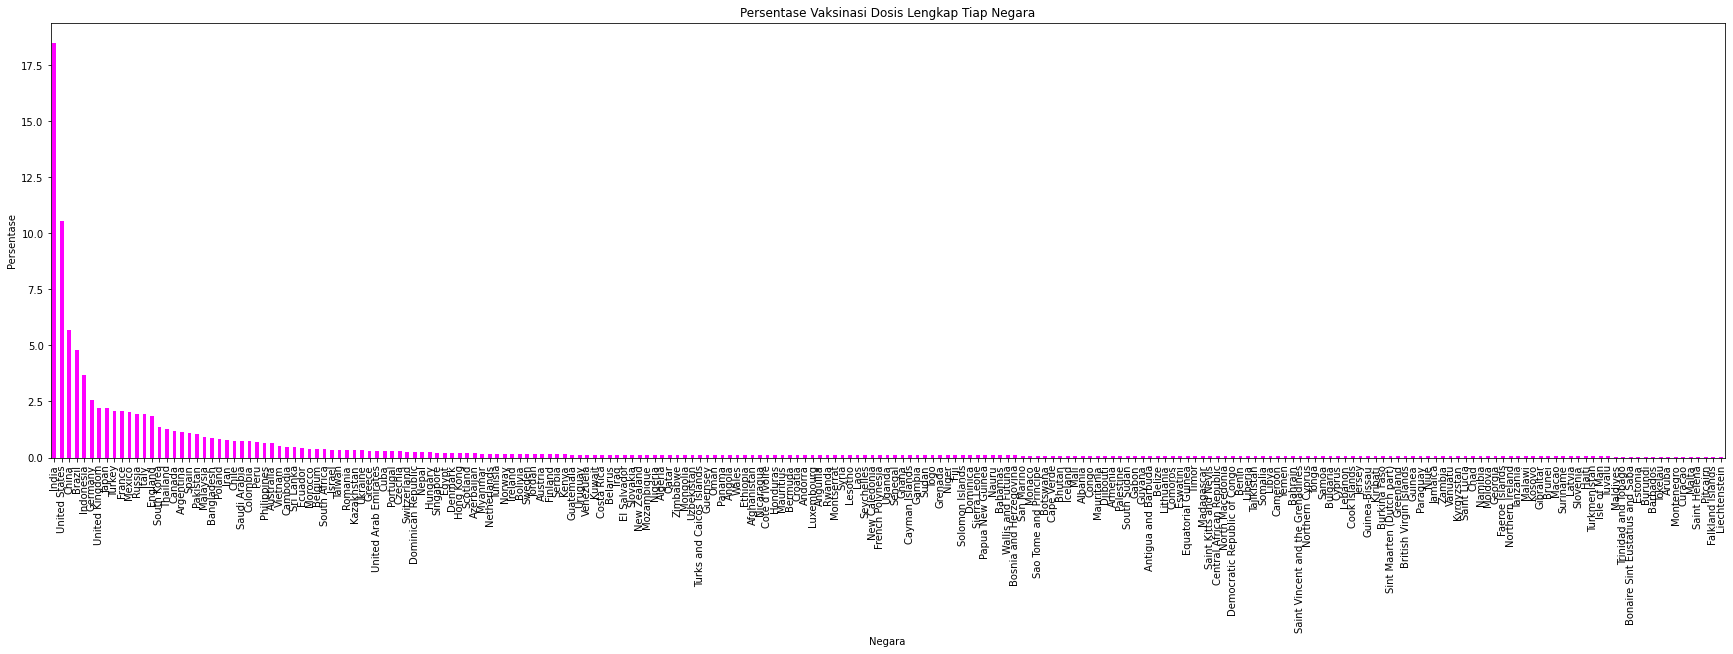

In [35]:
# Melihat negara dengan persentase vaksinasi dosis lengkap 
# Persentase Vaksinasi Dosis Lengkap Keseluruhan

fig1,ax1 = plt.subplots() # definisi gambar dan sumbu (axes)

dfvac2.groupby('Country').sum()['percent'].sort_values(ascending=False).plot(kind='bar',ax=ax1,figsize=(30,8), color='magenta')

ax1.set_title('Persentase Vaksinasi Dosis Lengkap Tiap Negara') # tambahkan judul grafik
ax1.set_xlabel('Negara') # tambahkan keterangan sumbu x
ax1.set_ylabel('Persentase') # tambahkan keterangan sumbu y

Berdasarkan hasil visualisasi `Country` dengan `percent`, menghasilkan grafik di atas yang menunjukkan bahwa `India` adalah negara dengan persentase tertinggi sebagai negara yang sudah melakukan vaksinasi Covid-19 dosis lengkap. Hal ini dapat terjadi karena `India` sempat menjadi negara dengan kasus **kematian harian Covid-19 tertinggi di dunia** pada bulan Juni 2021. Oleh sebab itu, gerakan vaksin di India cukup masif agar cepat mencapai kekebalan kelompok.

Setelah India, terdapat `United States`, disusul oleh `China`, `Brazil`, dan `Indonesia` sebagai negara dengan persentase tertinggi yang sudah melakukan vaksinasi dosis lengkap. Hal ini karena negara-negara tersebut juga termasuk negara dengan kasus Covid-19 aktif dan kematian harian tertinggi di dunia.

In [36]:
# Menghitung rata-rata rasio (dalam persen) antara penduduk yang divaksinasi lengkap dengan jumlah penduduk sampai dengan saat ini di semua negara

print ('Rata-rata: ' + str(dfvac2['People Fully Vac/Hundred'].mean())) # mencari rata-rata dosis lengkap per 100 populasi

Rata-rata: 35.52324287407866


Rata-rata persentase vaksinasi dosis lengkap per 100 populasi semua negara di seluruh dunia adalah 35.5%. Angka ini didapat berdasarkan pengambilan data di atas yaitu bulan Desember 2020 - Maret 2022.

Hal ini berarti belum mencapai angka minimal untuk dapat membentuk kekebalan kelompok (*herd immunity*). Kekebalan kelompok di dunia didapatkan jika vaksinasi sudah menyentuh minimal 70% populasi. 

# Overall Analysis

Rentang waktu pengambilan data vaksinasi Covid-19 di atas dimulai pada 2 Desember 2020 hingga 29 Maret 2022. Vaksinasi Covid-19 ini memakan waktu selama 482 hari atau 1 tahun 4 bulan 7 hari.

Berdasarkan analisis data tersebut, terdapat 223 negara yang melakukan vaksinasi Covid-19, termasuk negara bagian di dunia, karena jumlah negara di dunia hanya 195 negara. Rata-rata vaksinasi Covid-19 terbanyak (tertinggi) per hari adalah `China` dengan urutan pertama, diikuti oleh `India`, `United States`, `Brazil`, dan `Indonesia`.

Kombinasi jenis vaksin yang digunakan untuk melakukan vaksinasi Covid-19 memiliki jenis yang berbeda di setiap negara. Terdapat 84 kombinasi jenis vaksin Covid-19 di tiap negara. Kombinasi vaksin jenis `Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech` adalah kombinasi vaksin yang paling sering digunakan, yaitu sebanyak 7688 kali. Pemilihan jenis vaksin tersebut didasarkan oleh tipe vaksin (vaksin mRNA dan vaksin virus yang dilemahkan), efikasi (keefektifan), KIPI (Kejadian Ikutan Pasca Imunisasi), lama waktu pembentukan antibodi, negara produksi vaksin, serta syarat vaksin untuk usia dan keadaan tertentu (ibu hamil, ibu menyusui, lansia, anak-anak). Merujuk pada lima negara dengan rata-rata vaksinasi per hari terbanyak (tertinggi), maka penggunaan vaksin di negara tersebut meliputi:
1.   `China`: CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001
2.   `India`: Covaxin, Oxford/AstraZeneca, Sputnik V
3.   `United States`: Johnson&Johnson, Moderna, Pfizer/BioNTech
4.   `Brazil`: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
5.   `Indonesia`: Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac

Sedangkan negara yang sudah melakukan vaksinasi Covid-19 dosis lengkap (yaitu minimal 2 dosis vaksin, karena ada juga vaksin booster yang dimulai dari bulan Januari 2022) paling tinggi adalah `China` dengan persentase 26.2% dari populasinya. Diikuti oleh `India` sebanyak 17.5%, `United States` 4.6%, `Brazil` 3.39%, dan `Indonesia` sebesar 3.36%.

`China, India, United States, Brazil, dan Indonesia` adalah lima negara teratas yang sudah melakukan vaksinasi Covid-19. Hal ini karena negara-negara tersebut merupakan negara dengan kasus aktif harian terbanyak dan kasus kematian tertinggi di dunia. Sehingga vaksinasi Covid-19 sangat digencarkan untuk menekan korban jiwa. Perkembangan vaksinasi Covid-19 terus mengalami peningkatan hari demi hari karena WHO menargetkan untuk cepat mencapai kekebalan kelompok (*herd immunity*).

Namun, karena distribusi vaksinasi per hari di semua negara tidak merata, hal ini menjadi penghambat untuk mencapai kekebalan kelompok. Ketidakmerataan distribusi ini bisa diakibatkan oleh:
*   **Status ekonomi tiap negara**. Karena membeli vaksin akibat pandemi adalah tanggung jawab negara, gratis untuk masyarakat.
*   **Hubungan kerja sama antar negara (politik)**. Tiap jenis vaksin diproduksi oleh negara yang berbeda, jika hubungan negara dengan si produksi vaksin baik, akan mendapat *supply* khusus dan diprioritaskan.
*   **Masyarakat yang kurang percaya terhadap vaksin (*anti-vax*)**.

Pelaksanaan progam vaksinasi Covid-19 ini bisa merata jika setiap negara memenuhi minimal rata-rata total vaksinasi adalah sebanyak 23859743 - 26003560 orang/hari.

Persentase vaksinasi dosis lengkap paling tinggi adalah `India`. Hal ini dapat terjadi karena `India` sempat menjadi negara dengan kasus **kematian harian Covid-19 tertinggi di dunia** pada bulan Juni 2021. Oleh sebab itu, gerakan vaksin di India cukup masif agar cepat mencapai kekebalan kelompok. Setelah India, terdapat `United States`, disusul oleh `China`, `Brazil`, dan `Indonesia` sebagai negara dengan persentase tertinggi yang sudah melakukan vaksinasi dosis lengkap.

Akan tetapi, rata-rata persentase vaksinasi dosis lengkap per 100 populasi semua negara di seluruh dunia adalah 35.5%. Hal ini berarti belum mencapai angka minimal untuk dapat membentuk kekebalan kelompok (*herd immunity*). **Kekebalan kelompok di dunia didapatkan jika vaksinasi sudah menyentuh minimal 70% populasi.**

